In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

**Train test split**

In [30]:
df_new = pd.read_csv(r"D:\\OneDrive - St. Clair College\\St. Clair\\SEM 4\\DAB422 CAPSTONE PROJECT 2\\Data\\cleaned_data.csv")

In [31]:
df_new = df_new.iloc[:,:-4]

In [32]:
x = pd.get_dummies(df_new.drop(columns = ["SCORE", "_id", "RSN", "WARDNAME", "SITE_ADDRESS", "GRID", "RESULTS_OF_SCORE", "EVALUATION_COMPLETED_ON"]), drop_first = True)
y = df_new[["SCORE"]]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 123)

In [34]:
print(x_train.shape)
print(x_test.shape)

(10725, 63)
(4597, 63)


In [35]:
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

(10725, 1)
(4597, 1)


In [204]:
df_new = df_new.iloc[:,:-4]

In [205]:
df_new = df_new[df_new["SCORE"] != 0]

In [206]:
x = pd.get_dummies(df_new.drop(columns = ["SCORE", "_id", "RSN", "WARDNAME", "SITE_ADDRESS", "GRID", "RESULTS_OF_SCORE", "EVALUATION_COMPLETED_ON"]), drop_first = True)
y = df_new[["SCORE"]]
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.3, random_state = 123)

In [207]:
def metrics(model, y_pred, y_actual):
    print(f"----------{model}----------")
    print(f"MSE : {mean_squared_error(y_actual, y_pred)}")
    print(f"RMSE : {(mean_squared_error(y_actual, y_pred))**0.5}")
    print(f"MAE : {mean_absolute_error(y_actual, y_pred)}")
    print(f"R^2 : {r2_score(y_actual, y_pred)}")

In [99]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [100]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [101]:
rd_reg = RandomForestRegressor()
rd_reg.fit(x_train, y_train)

RandomForestRegressor()

In [102]:
metrics("Linear Regression", lin_reg.predict(x_test), y_test)

----------Linear Regression----------
MSE : 7.285764093386743
RMSE : 2.6992154588670285
MAE : 1.7085282832610333
R^2 : 0.9464454989305361


In [103]:
metrics("Decision Tree", dt_reg.predict(x_test), y_test)

----------Decision Tree----------
MSE : 18.712203611050686
RMSE : 4.325760466212928
MAE : 3.0067435283880792
R^2 : 0.8624546834820439


In [104]:
metrics("Random Forest", rd_reg.predict(x_test), y_test)

----------Random Forest----------
MSE : 7.172954955163996
RMSE : 2.678237285074643
MAE : 1.8160870132695235
R^2 : 0.9472747101204894


In [105]:
def model_building(models, data, columns_to_drop, test_size):
    x = pd.get_dummies(data.drop(columns = columns_to_drop), drop_first = True)
    y = data[["SCORE"]]
    x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = test_size, random_state = 123)

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        metrics(model_name, y_pred, y_test)
        print()

def metrics(model, y_pred, y_actual):
    print(f"----------{model}----------")
    print(f"MSE : {mean_squared_error(y_actual, y_pred)}")
    print(f"RMSE : {(mean_squared_error(y_actual, y_pred))**0.5}")
    print(f"MAE : {mean_absolute_error(y_actual, y_pred)}")
    print(f"R^2 : {r2_score(y_actual, y_pred)}")

In [106]:
model_building(models = {"Linear Regression" : LinearRegression(), "Decision Tree" : DecisionTreeRegressor(), "Random Forest" : RandomForestRegressor(), "Ada Boost" : AdaBoostRegressor()},
               data = df_new,
               columns_to_drop = ["SCORE", "_id", "RSN", "WARDNAME", "SITE_ADDRESS", "GRID", "RESULTS_OF_SCORE", "EVALUATION_COMPLETED_ON"],
               test_size = 0.3)

----------Linear Regression----------
MSE : 7.285764093386743
RMSE : 2.6992154588670285
MAE : 1.7085282832610333
R^2 : 0.9464454989305361

----------Decision Tree----------
MSE : 18.09876006090929
RMSE : 4.254263750745749
MAE : 2.998477267783337
R^2 : 0.8669638417310631

----------Random Forest----------
MSE : 7.164415133208856
RMSE : 2.6766425112832786
MAE : 1.8144174099050105
R^2 : 0.9473374826585742

----------Ada Boost----------
MSE : 18.005933958745047
RMSE : 4.243339953237903
MAE : 3.3067852567705223
R^2 : 0.8676461662647577



**Linear Regression**

In [36]:
def linreg(X_train, Y_train, cv = 5):
    
    model = LinearRegression()
    
    parameters = {'fit_intercept' : [True, False], 'copy_X' : [True, False]}
    
    grid_search_lin = GridSearchCV(estimator = model,
                                  param_grid = parameters,
                                  scoring = 'r2',
                                  cv = cv)
    
    grid_search_lin.fit(X_train, Y_train)
    best_params = grid_search_lin.best_params_
    best_score = grid_search_lin.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [26]:
linreg(x_train,y_train,cv = 5)

best_params : {'copy_X': True, 'fit_intercept': True}
best_score : 0.9345467939886383


In [37]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

LinearRegression()

**Decision Tree**

In [28]:
def dt(X_train, Y_train, cv = 5):
    
    model = DecisionTreeRegressor()
    
    parameters = {'max_depth': [2, 3, 4, 5],
                'min_samples_split': [2, 3, 4, 5],
                'min_samples_leaf': [1, 2, 3, 4, 5]}
    
    grid_search_dt = GridSearchCV(estimator = model,
                                  param_grid = parameters,
                                  scoring = 'r2',
                                  cv = cv)
    
    grid_search_dt.fit(X_train, Y_train)
    best_params = grid_search_dt.best_params_
    best_score = grid_search_dt.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [29]:
dt(x_train,y_train)

best_params : {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
best_score : 0.8264499872198195


In [38]:
dt_reg = DecisionTreeRegressor(max_depth = 5,
                               min_samples_leaf = 3,
                               min_samples_split = 2)

dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

**Random Forest**

In [41]:
def rf(X_train, Y_train, cv = 5):
    
    model = RandomForestRegressor()
    
    parameters = {'n_estimators': range(50, 200, 10),
                'max_depth': range(3, 11),
                'max_features': range(1, X_train.shape[1]),
                'min_samples_split': range(2, 11),
                'min_samples_leaf': range(1, 11),
                'bootstrap': [True, False]}
    
    random_search_rf = RandomizedSearchCV(estimator = model, 
                                       param_distributions = parameters, 
                                       cv = 5,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_rf.fit(X_train, Y_train)
    best_params = random_search_rf.best_params_
    best_score = random_search_rf.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [42]:
rf(x_train,y_train)

best_params : {'n_estimators': 110, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 32, 'max_depth': 10, 'bootstrap': True}
best_score : 0.9397287326097177


In [43]:
rf_reg = RandomForestRegressor(n_estimators = 110, 
                               min_samples_split = 7, 
                               min_samples_leaf = 4, 
                               max_features = 32,
                               max_depth = 10, 
                               bootstrap = True)

rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=32, min_samples_leaf=4,
                      min_samples_split=7, n_estimators=110)

**KNN**

In [44]:
def knn(X_train, Y_train, cv = 5):
    
    model = KNeighborsRegressor()
    
    parameters = {'n_neighbors': range(1, 31),
                'weights': ['uniform', 'distance'],
                'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                'leaf_size': range(10, 51),
                'p': [1, 2]}
    
    random_search_knn = RandomizedSearchCV(estimator = model, 
                                       param_distributions = parameters, 
                                       cv = 5,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_knn.fit(X_train, Y_train)
    best_params = random_search_knn.best_params_
    best_score = random_search_knn.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [45]:
knn(x_train,y_train)

best_params : {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 40, 'algorithm': 'brute'}
best_score : 0.5859496780010349


In [46]:
knn_reg = KNeighborsRegressor(weights = 'distance', 
                              p = 1, 
                              n_neighbors = 9, 
                              leaf_size = 40, 
                              algorithm = 'brute')

knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=40, n_neighbors=9, p=1,
                    weights='distance')

**Ada Boost**

In [49]:
def adb(X_train, Y_train, cv = 5):
    
    model = AdaBoostRegressor()
    
    parameters = {'estimator': [DecisionTreeRegressor(max_depth = 1), DecisionTreeRegressor(max_depth = 2)],
                'n_estimators': np.arange(50, 500, 50),
                'learning_rate': np.logspace(-4, 0, 100)}
    
    random_search_adb = RandomizedSearchCV(estimator = model, 
                                       param_distributions = parameters, 
                                       cv = 5,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_adb.fit(X_train, Y_train)
    best_params = random_search_adb.best_params_
    best_score = random_search_adb.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [50]:
adb(x_train,y_train)

best_params : {'n_estimators': 450, 'learning_rate': 0.04229242874389499, 'estimator': DecisionTreeRegressor(max_depth=2)}
best_score : 0.833786726582152


In [51]:
adb_reg = AdaBoostRegressor(n_estimators = 450, 
                            learning_rate = 0.04229242874389499, 
                            estimator = DecisionTreeRegressor(max_depth=2))

adb_reg.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.04229242874389499, n_estimators=450)

**Gradient Boost**

In [52]:
def gdb(X_train, Y_train, cv = 5):
    
    model = GradientBoostingRegressor()
    
    parameters = {'n_estimators': np.arange(100, 1000, 100),
                'learning_rate': np.logspace(-4, 0, 100),
                'max_depth': [3, 5, 7, 9],
                'subsample': np.arange(0.5, 1.0, 0.1),
                'min_samples_split': np.arange(2, 10, 2)}

    random_search_gdb = RandomizedSearchCV(estimator = model, 
                                       param_distributions = parameters, 
                                       cv = 5,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_gdb.fit(X_train, Y_train)
    best_params = random_search_gdb.best_params_
    best_score = random_search_gdb.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [53]:
gdb(x_train,y_train)

best_params : {'subsample': 0.5, 'n_estimators': 900, 'min_samples_split': 6, 'max_depth': 3, 'learning_rate': 0.0509413801481638}
best_score : 0.9766810414764537


In [54]:
gdb_reg = GradientBoostingRegressor(subsample = 0.5, 
                                    n_estimators = 900, 
                                    min_samples_split = 6, 
                                    max_depth = 3,
                                    learning_rate = 0.0509413801481638)

gdb_reg.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.0509413801481638, min_samples_split=6,
                          n_estimators=900, subsample=0.5)

**Cat Boost**

In [55]:
def catb(X_train, Y_train, cv = 5):
    
    model = CatBoostRegressor(logging_level = 'Silent')
    
    parameters = {'n_estimators': np.arange(100, 1000, 100),
                'learning_rate': np.logspace(-4, 0, 100),
                'max_depth': [3, 5, 7, 9],
                'subsample': np.arange(0.5, 1.0, 0.1),
                'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
                'l2_leaf_reg': np.logspace(-4, 4, 100)}

    random_search_cat = RandomizedSearchCV(estimator = model,
                                       param_distributions = parameters, 
                                       cv = 5,
                                       verbose = False,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_cat.fit(X_train, Y_train)
    best_params = random_search_cat.best_params_
    best_score = random_search_cat.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [56]:
catb(x_train,y_train)

best_params : {'subsample': 0.8999999999999999, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.09770099572992257, 'l2_leaf_reg': 4.037017258596558, 'colsample_bylevel': 0.5}
best_score : 0.9770105135535617


In [57]:
catb_reg = CatBoostRegressor(subsample = 0.8999999999999999,
                            n_estimators = 400,
                            max_depth = 3,
                            learning_rate = 0.09770099572992257,
                            l2_leaf_reg = 4.037017258596558,
                            colsample_bylevel = 0.5,
                            logging_level = 'Silent')

catb_reg.fit(x_train,y_train)

**Light Gradient Boosting**

In [58]:
def lgbr(X_train, Y_train, cv = 5):
    
    model = LGBMRegressor()
    
    parameters = {'learning_rate': np.logspace(-3, 0, 100),
                'n_estimators': range(50, 200, 10),
                'max_depth': range(3, 11),
                'colsample_bytree': np.arange(0.5, 1.0, 0.1),
                'num_leaves': range(5, 50),
                'min_data_in_leaf': range(5, 50),
                'feature_fraction': np.linspace(0.1, 1, 10)}
    
    random_search_lgb = RandomizedSearchCV(estimator = model, 
                                       param_distributions = parameters, 
                                       cv = 5,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_lgb.fit(X_train, Y_train)
    best_params = random_search_lgb.best_params_
    best_score = random_search_lgb.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [60]:
lgbr(np.array(x_train),np.array(y_train))

[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 8580, number of used features: 61
[LightGBM] [Info] Start training from score 76.942657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] feature_fraction is set=0.7000000000000001, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.7000000000000001, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be 

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set

[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.7000000000000001, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.7000000000000001
[LightGBM] [Warning] min_data_in_leaf is set=7, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=7
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current 

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] feature_fraction is set=0.1, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=0.1
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=20 will be ignored. Current value: min_da

[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=0.8999999999999999 will be ignored. Cu

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.5 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.7 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warn

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=0.7999999999999999 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_da

In [61]:
lgb_reg = LGBMRegressor(num_leaves = 41, 
                        n_estimators = 180, 
                        min_data_in_leaf = 14,  
                        max_depth = 10,
                        learning_rate = 0.13219411484660287,
                        feature_fraction = 1.0,
                        colsample_bytree = 0.8999999999999999)

lgb_reg.fit(np.array(x_train),np.array(y_train))

[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 10725, number of used features: 62
[LightGBM] [Info] Start training from score 76.950117
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor(colsample_bytree=0.8999999999999999, feature_fraction=1.0,
              learning_rate=0.13219411484660287, max_depth=10,
              min_data_in_leaf=14, n_estimators=180, num_leaves=41)

**Xtreme Gradient Boosting**

In [62]:
def xgb(X_train, Y_train, cv = 5):
    
    model = XGBRegressor()
    
    parameters = {'n_estimators': np.arange(100, 1000, 100),
                'learning_rate': np.logspace(-4, 0, 100),
                'max_depth': [3, 5, 7, 9],
                'subsample': np.arange(0.5, 1.0, 0.1),
                'colsample_bytree': np.arange(0.5, 1.0, 0.1),
                'gamma': np.logspace(-4, 0, 100),
                'reg_alpha': np.logspace(-4, 0, 100)}

    random_search_xgb = RandomizedSearchCV(estimator = model, 
                                       param_distributions = parameters, 
                                       cv = 5,
                                       scoring = 'r2',
                                       n_iter = 20)
    
    random_search_xgb.fit(X_train, Y_train)
    best_params = random_search_xgb.best_params_
    best_score = random_search_xgb.best_score_
    print(f'best_params : {best_params}')
    print(f'best_score : {best_score}')

In [63]:
xgb(x_train,y_train)

best_params : {'subsample': 0.6, 'reg_alpha': 0.004534878508128582, 'n_estimators': 800, 'max_depth': 7, 'learning_rate': 0.06734150657750829, 'gamma': 0.4750810162102798, 'colsample_bytree': 0.6}
best_score : 0.9754443883895874


In [64]:
xgb_reg = XGBRegressor(subsample = 0.6,
                       reg_alpha = 0.004534878508128582,
                       n_estimators = 800,
                       max_depth = 7,
                       learning_rate = 0.06734150657750829,
                       gamma = 0.4750810162102798,
                       colsample_bytree = 0.6)

xgb_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4750810162102798, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06734150657750829,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=800, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model Evaluation**

In [65]:
cv_scores_lr = cross_val_score(lin_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_dt = cross_val_score(dt_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_rf = cross_val_score(rf_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_knn = cross_val_score(knn_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_adb = cross_val_score(adb_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_gdb = cross_val_score(gdb_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_cat = cross_val_score(catb_reg, x_train, y_train, cv = 5, scoring = 'r2')
cv_scores_lgb = cross_val_score(lgb_reg, np.array(x_train), np.array(y_train), cv = 5, scoring = 'r2')
cv_scores_xgb = cross_val_score(xgb_reg, x_train, y_train, cv = 5, scoring = 'r2')

[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 923
[LightGBM] [Info] Number of data points in the train set: 8580, number of used features: 62
[LightGBM] [Info] Start training from score 76.942657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

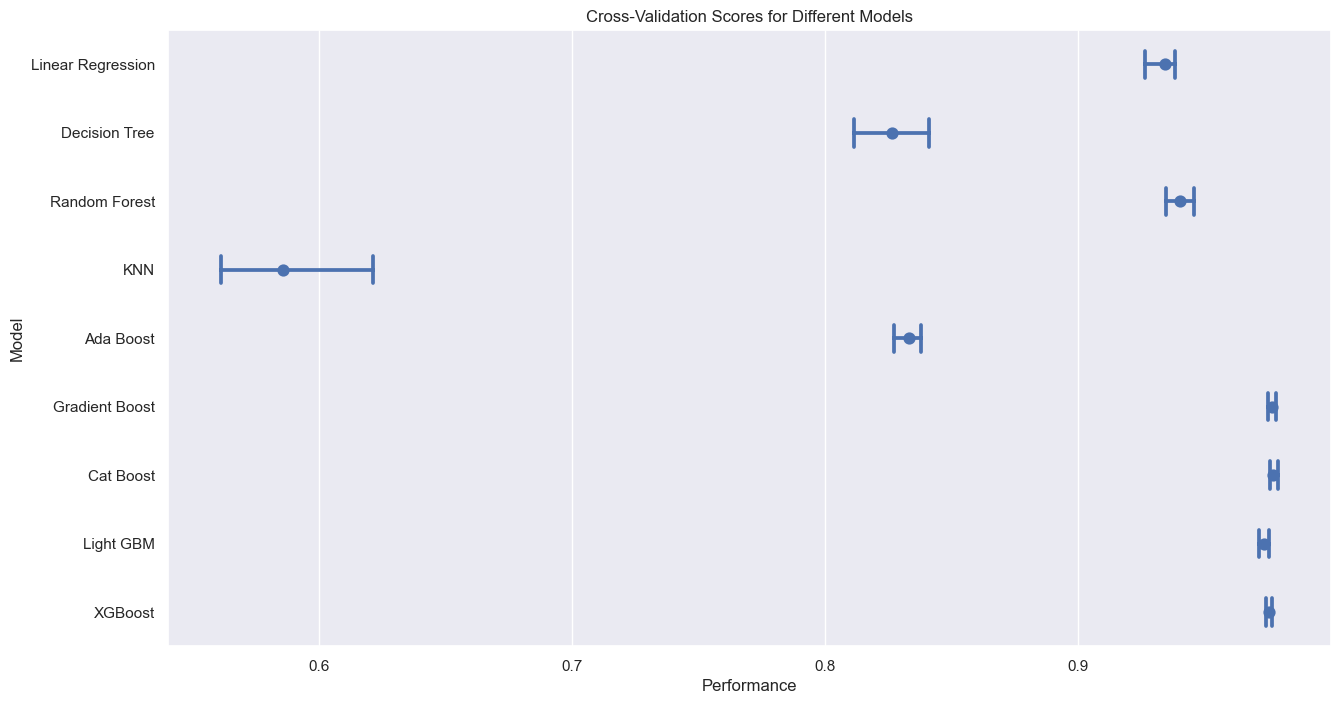

In [77]:
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Ada Boost', 'Gradient Boost', 'Cat Boost', 'Light GBM', 'XGBoost']

cv_scores = np.concatenate([cv_scores_lr, 
                            cv_scores_dt, 
                            cv_scores_rf, 
                            cv_scores_knn, 
                            cv_scores_adb, 
                            cv_scores_gdb, 
                            cv_scores_cat, 
                            cv_scores_lgb,
                            cv_scores_xgb])


models = np.repeat(model_names, len(cv_scores_lr))


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [15,8])
sns.pointplot( x = cv_scores, y = models, join = False, errorbar = ('ci', 100), capsize = .4, ax = ax)

# ax.set_xlim(0.5, 1.0)
# ax.set_xticks(np.arange(0.5, 1.05, 0.02))
            

plt.xlabel('Performance')
plt.ylabel('Model')
plt.title('Cross-Validation Scores for Different Models')

plt.show()

*Observation :*
- Gradient Boost, Cat Boost, Light GBM, and XGBoost produce better results, with XGBoost producing the most accurate results. 

In [73]:
print('-------------Linear Regression-----------')

lin_reg_mae = mean_absolute_error(y_test,lin_reg.predict(x_test))
print(f'MAE : {lin_reg_mae:1.2f}')
lin_reg_mse = mean_squared_error(y_test,lin_reg.predict(x_test))
print(f'MSE : {lin_reg_mse:1.2f}')
lin_reg_rmse = np.sqrt(lin_reg_mse)
print(f'RMSE : {lin_reg_rmse:1.2f}')
lin_reg_r = r2_score(y_test,lin_reg.predict(x_test))
print(f'R2 : {lin_reg_r:1.2f}')

print()
print('---------------Decision Tree-------------')

dt_reg_mae = mean_absolute_error(y_test,dt_reg.predict(x_test))
print(f'MAE : {dt_reg_mae:1.2f}')
dt_reg_mse = mean_squared_error(y_test,dt_reg.predict(x_test))
print(f'MSE : {dt_reg_mse:1.2f}')
dt_reg_rmse = np.sqrt(dt_reg_mse)
print(f'RMSE : {dt_reg_rmse:1.2f}')
dt_reg_r = r2_score(y_test,dt_reg.predict(x_test))
print(f'R2 : {dt_reg_r:1.2f}')

print()
print('---------------Random Forest-------------')

rf_reg_mae = mean_absolute_error(y_test,rf_reg.predict(x_test))
print(f'MAE : {rf_reg_mae:1.2f}')
rf_reg_mse = mean_squared_error(y_test,rf_reg.predict(x_test))
print(f'MSE : {rf_reg_mse:1.2f}')
rf_reg_rmse = np.sqrt(rf_reg_mse)
print(f'RMSE : {rf_reg_rmse:1.2f}')
rf_reg_r = r2_score(y_test,rf_reg.predict(x_test))
print(f'R2 : {rf_reg_r:1.2f}')

print()
print('-------------------KNN--------------------')

knn_reg_mae = mean_absolute_error(y_test,knn_reg.predict(x_test))
print(f'MAE : {knn_reg_mae:1.2f}')
knn_reg_mse = mean_squared_error(y_test,knn_reg.predict(x_test))
print(f'MSE : {knn_reg_mse:1.2f}')
knn_reg_rmse = np.sqrt(knn_reg_mse)
print(f'RMSE : {knn_reg_rmse:1.2f}')
knn_reg_r = r2_score(y_test,knn_reg.predict(x_test))
print(f'R2 : {knn_reg_r:1.2f}')

print()
print('------------------Ada Boost----------------')

adb_reg_mae = mean_absolute_error(y_test,adb_reg.predict(x_test))
print(f'MAE : {adb_reg_mae:1.2f}')
adb_reg_mse = mean_squared_error(y_test,adb_reg.predict(x_test))
print(f'MSE : {adb_reg_mse:1.2f}')
adb_reg_rmse = np.sqrt(adb_reg_mse)
print(f'RMSE : {adb_reg_rmse:1.2f}')
adb_reg_r = r2_score(y_test,adb_reg.predict(x_test))
print(f'R2 : {adb_reg_r:1.2f}')

print()
print('---------------Gradient Boost---------------')

gdb_reg_mae = mean_absolute_error(y_test,gdb_reg.predict(x_test))
print(f'MAE : {gdb_reg_mae:1.2f}')
gdb_reg_mse = mean_squared_error(y_test,gdb_reg.predict(x_test))
print(f'MSE : {gdb_reg_mse:1.2f}')
gdb_reg_rmse = np.sqrt(gdb_reg_mse)
print(f'RMSE : {gdb_reg_rmse:1.2f}')
gdb_reg_r = r2_score(y_test,gdb_reg.predict(x_test))
print(f'R2 : {gdb_reg_r:1.2f}')

print()
print('-----------------Cat Boost-----------------')

cat_reg_mae = mean_absolute_error(y_test,catb_reg.predict(x_test))
print(f'MAE : {cat_reg_mae:1.2f}')
cat_reg_mse = mean_squared_error(y_test,catb_reg.predict(x_test))
print(f'MSE : {cat_reg_mse:1.2f}')
cat_reg_rmse = np.sqrt(cat_reg_mse)
print(f'RMSE : {cat_reg_rmse:1.2f}')
cat_reg_r = r2_score(y_test,catb_reg.predict(x_test))
print(f'R2 : {cat_reg_r:1.2f}')

print()
print('-------------Light Gradient Boost-----------')

lgb_reg_mae = mean_absolute_error(np.array(y_test),lgb_reg.predict(np.array(x_test)))
print(f'MAE : {lgb_reg_mae:1.2f}')
lgb_reg_mse = mean_squared_error(np.array(y_test),lgb_reg.predict(np.array(x_test)))
print(f'MSE : {lgb_reg_mse:1.2f}')
lgb_reg_rmse = np.sqrt(lgb_reg_mse)
print(f'RMSE : {lgb_reg_rmse:1.2f}')
lgb_reg_r = r2_score(np.array(y_test),lgb_reg.predict(np.array(x_test)))
print(f'R2 : {lgb_reg_r:1.2f}')

print()
print('-------------Xtreme Gradient Boost-----------')

xgb_reg_mae = mean_absolute_error(y_test,xgb_reg.predict(x_test))
print(f'MAE : {xgb_reg_mae:1.2f}')
xgb_reg_mse = mean_squared_error(y_test,xgb_reg.predict(x_test))
print(f'MSE : {xgb_reg_mse:1.2f}')
xgb_reg_rmse = np.sqrt(xgb_reg_mse)
print(f'RMSE : {xgb_reg_rmse:1.2f}')
xgb_reg_r = r2_score(y_test,xgb_reg.predict(x_test))
print(f'R2 : {xgb_reg_r:1.2f}')

-------------Linear Regression-----------
MAE : 2.05
MSE : 10.93
RMSE : 3.31
R2 : 0.92

---------------Decision Tree-------------
MAE : 3.70
MSE : 24.07
RMSE : 4.91
R2 : 0.82

---------------Random Forest-------------
MAE : 2.03
MSE : 8.66
RMSE : 2.94
R2 : 0.94

-------------------KNN--------------------
MAE : 5.50
MSE : 54.84
RMSE : 7.41
R2 : 0.60

------------------Ada Boost----------------
MAE : 3.74
MSE : 23.58
RMSE : 4.86
R2 : 0.83

---------------Gradient Boost---------------
MAE : 1.08
MSE : 3.60
RMSE : 1.90
R2 : 0.97

-----------------Cat Boost-----------------
MAE : 1.04
MSE : 3.51
RMSE : 1.87
R2 : 0.97

-------------Light Gradient Boost-----------
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=0.8999999999999999 will be ignored. Current value: feature_fraction=1.0
MAE : 1.19
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_sam

In [74]:
result = pd.DataFrame({'MAE' : [lin_reg_mae, dt_reg_mae, rf_reg_mae, knn_reg_mae, adb_reg_mae, gdb_reg_mae, cat_reg_mae, lgb_reg_mae, xgb_reg_mae],
                     'MSE' : [lin_reg_mse, dt_reg_mse, rf_reg_mse, knn_reg_mse, adb_reg_mse, gdb_reg_mse, cat_reg_mse, lgb_reg_mse, xgb_reg_mse],
                     'RMSE' : [lin_reg_rmse, dt_reg_rmse, rf_reg_rmse, knn_reg_rmse, adb_reg_rmse, gdb_reg_rmse, cat_reg_rmse, lgb_reg_rmse, xgb_reg_rmse],
                     'R2' : [lin_reg_r, dt_reg_r, rf_reg_r, knn_reg_r, adb_reg_r, gdb_reg_r, cat_reg_r, lgb_reg_r, xgb_reg_r]}, 
                     index = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Ada Boost', 'Gradient Boost', 'Cat Boost', 'Light Gradient Boost', 'Xtreme Gradient Boost'])

In [75]:
result

,MAE,MSE,RMSE,R2
Linear Regression,2.047371,10.930869,3.306186,0.919382
Decision Tree,3.696054,24.067863,4.905901,0.822494
Random Forest,2.026007,8.662038,2.943134,0.936115
KNN,5.502074,54.840651,7.405447,0.595537
Ada Boost,3.740677,23.578462,4.855766,0.826103
Gradient Boost,1.080726,3.601511,1.897765,0.973438
Cat Boost,1.043927,3.511684,1.873949,0.974100
Light Gradient Boost,1.188533,4.192794,2.047631,0.969077
Xtreme Gradient Boost,1.064780,3.936558,1.984076,0.970967


*Observation :*
- Considering all these values, CatBoost is the best model for this dataset.